# Basic installs

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d78c323d5c605402306f5bc66d0a654fef968ae814e48ced5fc054b21975cf0f
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.4 MB/s eta 0:00:00


# Notes

* This is a non-editable file. To be able to edit it, please download it and upload your local copy to Google Colab.

* This is the only document that you will submit with your solutions. For each task, the cell should **output** (print or plot) **what is asked in bold, and nothing more**.

* **Task 3 is open-ended**, and the primary criterion for evaluation. However, we recommend that participants go through the tasks in order, as understanding tasks 1 and 2 is fundamental for task 3. **Tasks 1 and 2 are independent from each other.**

* You can create and reuse as many functions as you want. You can also install any packages available through `!pip install ...`, with the exception of quantum computing packages apart from Qiskit. **These tasks are to be solved using Qiskit.**

 * The final submission file **must include the cell outputs** you obtained, but we will re-run them to make sure they correspond to the code as written.

 * Notebooks missing installs/imports/definitions required to execute the cells without errors will be automatically disqualified. Before downlowading this file for submission, please **click "Runtime > Disconnect and delete runtime" followed by "Run all" to make sure the execution runs smoothly**. Better yet, do this occasionally to catch any bugs related to pre-defined variables.

* For the full rules, refer to [the hackathon website](https://sites.google.com/vt.edu/hackathon/rules).

# Task 1

##**1a)**

Create a one-qubit circuit with no gates or measurements. Calculate and **print the exact the expectation value of the Pauli X** operator in this circuit. You should use tools from `qiskit.quantum_info`.

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli

qc = QuantumCircuit(1)

statevector = Statevector.from_instruction(qc)
operator = Operator.from_label('X')
ev = statevector.expectation_value(operator)
print(f"Expectation value of Pauli X: {ev}")


Expectation value of Pauli X: 0j


##**1b)**

Repeat task **1a**, with the restriction that the final result must be obtained by calculating the expectation value of the Pauli Z operator in the circuit. You must still **print the expectation value of Pauli X**.

*Hint: You can use additional circuit gates.*

In [3]:
qc = QuantumCircuit(1)
qc.h(0)

statevector = Statevector.from_instruction(qc)
# X = HZH
operator = Operator.from_label('Z')
ev_1 = statevector.expectation_value(operator)
print(f"Expectation value of Pauli X: {ev_1}")


Expectation value of Pauli X: 0j


## **1c)**

Add an RY gate (rotation about the Y axis) as the first gate in the circuit you used for task **1b**. The rotation angle should be $\frac{\pi}{4}$. Recalculate and **print the expectation value of Pauli X**.

In [5]:
import numpy as np
qc = QuantumCircuit(1)
qc.ry(np.pi/4, 0)
qc.h(0)

statevector = Statevector.from_instruction(qc)
# Z = HZH
operator = Operator.from_label('Z')
ev_2 = statevector.expectation_value(operator)
print(f"Expectation value of rotated Pauli X: {ev_2}")

Expectation value of rotated Pauli X: (0.7071067811865472+0j)


## **1d)**

Write a function `get_x_exp_value` that calculates the expectation value of X in a circuit with a Y rotation gate. The rotation angle should be an argument of the function. **Print the output of `get_x_exp_value`$(\frac{\pi}{4})$**.

In [6]:
def get_x_exp_value(angle):
  qc =  QuantumCircuit(1)
  qc.ry(angle, 0)
  qc.h(0)

  state = Statevector.from_instruction(qc)
  operator = Operator.from_label('Z')
  ev = state.expectation_value(operator)
  return ev

print(get_x_exp_value(np.pi/4))


(0.7071067811865472+0j)


## **1e)**

Use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. You should perform an optimization over the rotation angle using `scipy.optimize`. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 numbers. The print statement should make it clear which optimizer and initial parameter value was used in each case.

In [7]:
from scipy.optimize import minimize
# how to do maximize? make negative of obj function and do minimize
def maximize(func, **kwargs):

  # negative of the actual function
  def obj_fn(x):
    # scipy passes x as a numpy array, get the scalar
    if isinstance(x, np.ndarray):
        x = float(x[0])
    return -1 * np.real(func(x, **func_kwargs)) # expectation value, we don't expect complex

  optimizers = kwargs.get("optimizers", ["Nelder-Mead", "BFGS"])
  init_params = kwargs.get("init_params", np.array([0.0, np.pi/4, np.pi]))
  # rest of the kwargs are passed to the func
  func_kwargs = {k: v for k, v in kwargs.items() if k not in ["optimizers", "init_params"]}

  for optimizer in optimizers:
      print(f"Optimizer: {optimizer}\n")
      for init_param in init_params:
          print(f"Initial value: {init_param}")
          result = minimize(obj_fn, x0=[init_param], method=optimizer)
          max_val = -result.fun
          opt_angle = float(np.real(result.x[0]))
          print(f"Maximum expectation value: {max_val}")
          print(f"Corresponding angle: {opt_angle}")
          print()

maximize(get_x_exp_value)

Optimizer: Nelder-Mead

Initial value: 0.0
Maximum expectation value: 0.9999999998692134
Corresponding angle: 1.5708125000000015

Initial value: 0.7853981633974483
Maximum expectation value: 1.0
Corresponding angle: 1.5707963267948943

Initial value: 3.141592653589793
Maximum expectation value: 0.9999999999999998
Corresponding angle: 1.5707963267948966

Optimizer: BFGS

Initial value: 0.0
Maximum expectation value: 1.0
Corresponding angle: 1.5707963348286986

Initial value: 0.7853981633974483
Maximum expectation value: 0.9999999999628226
Corresponding angle: 1.5707877038866607

Initial value: 3.141592653589793
Maximum expectation value: 1.0
Corresponding angle: 1.5707963241310194



## **1f)**

Rewrite your answer to task **1b**, now simulating circuit measurements using `AerSimulator`. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [8]:
from qiskit import transpile
from qiskit_aer import AerSimulator
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.measure_all()

simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)

shots = 100
job = simulator.run(transpiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(qc)

print(f"Number of times '0' is measured: {counts.get('0', 0)}")
print(f"Number of times '1' is measured: {counts.get('1', 0)}")

Number of times '0' is measured: 0
Number of times '1' is measured: 100


## **1g)**

Rewrite your answer to task **1c**, now simulating circuit measurements. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [9]:
qc = QuantumCircuit(1)
qc.ry(np.pi/4,0)
qc.h(0)
qc.z(0)
qc.h(0)
qc.measure_all()

simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)

shots = 100
job = simulator.run(transpiled_circuit, shots=shots)
result = job.result()
counts_1 = result.get_counts(qc)

print(f"Number of times '0' is measured: {counts_1.get('0', 0)}")
print(f"Number of times '1' is measured: {counts_1.get('1', 0)}")

Number of times '0' is measured: 12
Number of times '1' is measured: 88


## **1h)**

Use the samples you obtained in **1f** and **1g** to calculate the expectation value of Pauli X in the circuits. **Print the expectation value for each case.** The print statement should make it clear which value corresponds to which circuit.

*Hint: What happens when you apply a Pauli Z gate to states |0> and |1>? You can find out using Qiskit circuits or matrix algebra. Once you know the answer, you can calculate the expectation value using a weighed average.*

In [14]:
total_shots = 100

C0_f = counts.get('0', 0)
C1_f = counts.get('1', 0)

exp_val_1 = (C0_f*0 + C1_f*1)/total_shots

print(f"Expectation value of Pauli X (Circuit 1f): {exp_val_1}")

C0_g = counts_1.get('0', 0)
C1_g = counts_1.get('1', 0)

exp_val_1f = (C0_g*0 + C1_g*1)/total_shots

print(f"Expectation value of Pauli X (Circuit 1g): {exp_val_1f}")

Expectation value of Pauli X (Circuit 1f): 1.0
Expectation value of Pauli X (Circuit 1g): 0.86


## **1i)**

Run the calculations you did for **1f**, **1g** and **1h** ten times (for each circuit). **For each of the two circuits, print the expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [45]:
NUM_SHOTS = 100
NUM_RUNS = 10
simulator = AerSimulator()

def create_circuit_1f():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.z(0)
    qc.h(0)
    qc.measure_all()
    return qc

def create_circuit_1g():
    qc = QuantumCircuit(1)
    qc.ry(np.pi/4, 0)
    qc.h(0)
    qc.z(0)
    qc.h(0)
    qc.measure_all()
    return qc

def get_exp_val_from_counts(counts, shots):
    c0 = counts.get('0', 0)
    c1 = counts.get('1', 0)
    return (c0*0 + c1*1)/shots

def calculate_stats(results, exact_value):
    results = np.array(results)
    mean_exp_val = np.mean(results)
    std_dev = np.std(results)
    avg_error = np.mean(np.abs(results - exact_value))
    return mean_exp_val, std_dev, avg_error

results_1f = []
qc_1f = create_circuit_1f()
for _ in range(NUM_RUNS):
    job = simulator.run(qc_1f, shots=NUM_SHOTS)
    counts = job.result().get_counts(qc_1f)
    exp_val = get_exp_val_from_counts(counts, NUM_SHOTS)
    results_1f.append(exp_val)

results_1g = []
qc_1g = create_circuit_1g()
for _ in range(NUM_RUNS):
    job = simulator.run(qc_1g, shots=NUM_SHOTS)
    counts = job.result().get_counts(qc_1g)
    exp_val = get_exp_val_from_counts(counts, NUM_SHOTS)
    results_1g.append(exp_val)

mean_1f, std_1f, error_1f = calculate_stats(results_1f, ev_1)
mean_1g, std_1g, error_1g = calculate_stats(results_1g, ev_2)

print(f"Exact Expectation Value: {ev_1:.4f}")
print(f"Average Simulated Expectation Value: {mean_1f:.4f}")
print(f"Standard Deviation of Simulated Values: {std_1f:.4f}")
print(f"Average Error (w.r.t Exact Value): {error_1f:.4f}")

print(f"Exact Expectation Value: {ev_2:.4f}")
print(f"Average Simulated Expectation Value: {mean_1g:.4f}")
print(f"Standard Deviation of Simulated Values: {std_1g:.4f}")
print(f"Average Error (w.r.t Exact Value): {error_1g:.4f}")

Exact Expectation Value: 0.0000+0.0000j
Average Simulated Expectation Value: 1.0000
Standard Deviation of Simulated Values: 0.0000
Average Error (w.r.t Exact Value): 1.0000
Exact Expectation Value: 0.7071+0.0000j
Average Simulated Expectation Value: 0.8650
Standard Deviation of Simulated Values: 0.0169
Average Error (w.r.t Exact Value): 0.1579


## **1j)**

Increase the number of circuit executions from $100$ to $10^7$. Again, run the code ten times for each circuit. As in **1i**, **for each of the two cases, print the average expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [46]:
NUM_SHOTS = 10000000
NUM_RUNS = 10
simulator = AerSimulator()

def create_circuit_1f():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.z(0)
    qc.h(0)
    qc.measure_all()
    return qc

def create_circuit_1g():
    qc = QuantumCircuit(1)
    qc.ry(np.pi/4, 0)
    qc.h(0)
    qc.measure_all()
    return qc

def get_exp_val_from_counts(counts, shots):
    c0 = counts.get('0', 0)
    c1 = counts.get('1', 0)
    return (c0*0 + c1*1)/shots

def calculate_stats(results, exact_value):
    results = np.array(results)
    mean_exp_val = np.mean(results)
    std_dev = np.std(results)
    avg_error = np.mean(np.abs(results - exact_value))
    return mean_exp_val, std_dev, avg_error

results_1f = []
qc_1f = create_circuit_1f()
for _ in range(NUM_RUNS):
    job = simulator.run(qc_1f, shots=NUM_SHOTS)
    counts = job.result().get_counts(qc_1f)
    exp_val = get_exp_val_from_counts(counts, NUM_SHOTS)
    results_1f.append(exp_val)

results_1g = []
qc_1g = create_circuit_1g()
for _ in range(NUM_RUNS):
    job = simulator.run(qc_1g, shots=NUM_SHOTS)
    counts = job.result().get_counts(qc_1g)
    exp_val = get_exp_val_from_counts(counts, NUM_SHOTS)
    results_1g.append(exp_val)

mean_1f, std_1f, error_1f = calculate_stats(results_1f, ev_1)
mean_1g, std_1g, error_1g = calculate_stats(results_1g, ev_2)

print(f"Exact Expectation Value: {ev_1:.4f}")
print(f"Average Simulated Expectation Value: {mean_1f:.4f}")
print(f"Standard Deviation of Simulated Values: {std_1f:.4f}")
print(f"Average Error (w.r.t Exact Value): {error_1f:.4f}")

print(f"Exact Expectation Value: {ev_2:.4f}")
print(f"Average Simulated Expectation Value: {mean_1g:.4f}")
print(f"Standard Deviation of Simulated Values: {std_1g:.4f}")
print(f"Average Error (w.r.t Exact Value): {error_1g:.4f}")

Exact Expectation Value: 0.0000+0.0000j
Average Simulated Expectation Value: 1.0000
Standard Deviation of Simulated Values: 0.0000
Average Error (w.r.t Exact Value): 1.0000
Exact Expectation Value: 0.7071+0.0000j
Average Simulated Expectation Value: 0.1464
Standard Deviation of Simulated Values: 0.0001
Average Error (w.r.t Exact Value): 0.5607


## **1k)**

Write a function `sample_x_exp_value` similar to `get_x_exp_value` in task **1d**, but which uses measurements instead of exact expectation values. The number of circuit executions should be a `kwarg` named `executions`, with default value $10^3$. **Print the output of `sample_x_exp_value`$(\frac{\pi}{4})$**.

In [11]:
def sample_x_exp_value(angle, **kwargs):
  qc = QuantumCircuit(1)
  qc.ry(angle, 0)
  # X = HZH
  qc.h(0)
  qc.z(0)
  qc.h(0)
  qc.measure_all()

  simulator = AerSimulator()
  transpiled_circuit = transpile(qc, simulator)

  shots = kwargs.get("executions", 10**3)
  job = simulator.run(transpiled_circuit, shots=shots)
  result = job.result()
  counts = result.get_counts(qc)

  counts_0 = counts.get('0', 0)
  counts_1 = counts.get('1', 0)

  ev = (0 * counts_0 + 1 * counts_1)/shots
  return ev

print(f"Expectation value: {sample_x_exp_value(np.pi/4)}")

Expectation value: 0.873


## **1l)**

As you did for task **1e**, use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. Let the number of circuit executions take the default value. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values.

In [48]:
maximize(sample_x_exp_value)

Optimizer: Nelder-Mead

Initial value: 0.0
Maximum expectation value: 1.0
Corresponding angle: 0.0

Initial value: 0.7853981633974483
Maximum expectation value: 0.874
Corresponding angle: 0.8053590930811482

Initial value: 3.141592653589793
Maximum expectation value: 1.0
Corresponding angle: 6.283185307179577

Optimizer: BFGS

Initial value: 0.0
Maximum expectation value: 1.0
Corresponding angle: 0.0

Initial value: 0.7853981633974483
Maximum expectation value: 0.863
Corresponding angle: 0.7854376641356771

Initial value: 3.141592653589793
Maximum expectation value: 0.0
Corresponding angle: 3.141592653589793



## **1m)**

Repeat **1l** with the `executions` kwarg set to $10$ and $10^5$ instead of $10^3$. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values for each value of `executions`.

In [49]:
print("Using 10 Executions...")
print(20*"*")
maximize(sample_x_exp_value, executions=10)
print("")
print("Using 10^5 Executions...")
print(20*"*")
maximize(sample_x_exp_value, executions=10**5)

Using 10 Executions...
********************
Optimizer: Nelder-Mead

Initial value: 0.0
Maximum expectation value: 1.0
Corresponding angle: 0.0

Initial value: 0.7853981633974483
Maximum expectation value: 1.0
Corresponding angle: 0.7068583470577037

Initial value: 3.141592653589793
Maximum expectation value: 0.0
Corresponding angle: 3.141592653589793

Optimizer: BFGS

Initial value: 0.0
Maximum expectation value: 1.0
Corresponding angle: 0.0

Initial value: 0.7853981633974483
Maximum expectation value: 0.6
Corresponding angle: 0.7853981633974483

Initial value: 3.141592653589793
Maximum expectation value: 0.0
Corresponding angle: 3.141592653589793


Using 10^5 Executions...
********************
Optimizer: Nelder-Mead

Initial value: 0.0
Maximum expectation value: 1.0
Corresponding angle: 0.0

Initial value: 0.7853981633974483
Maximum expectation value: 1.0
Corresponding angle: 0.0

Initial value: 3.141592653589793
Maximum expectation value: 1.0
Corresponding angle: 6.283185307179577

O

## **1n)**

Create the following circuit and **print it using `circuit.draw('mpl')`**.

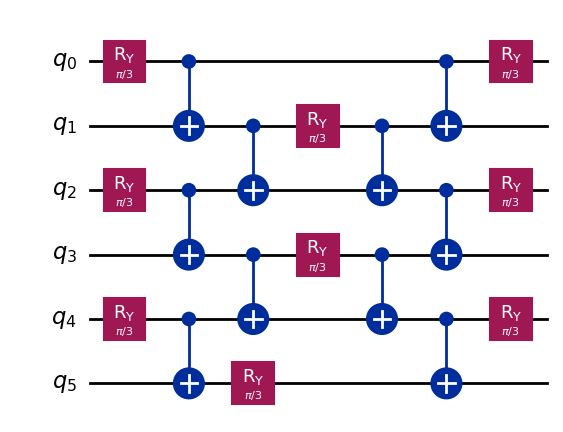

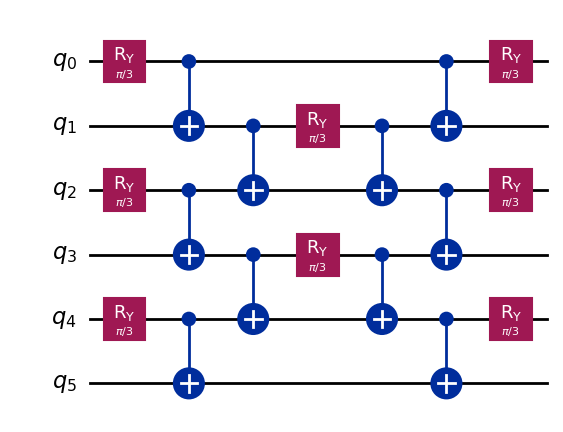

In [17]:
qc = QuantumCircuit(6)
qc.ry(np.pi/3,0)
qc.ry(np.pi/3,2)
qc.ry(np.pi/3,4)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(4,5)
qc.cx(1,2)
qc.cx(3,4)
qc.ry(np.pi/3,1)
qc.ry(np.pi/3,3)
qc.cx(1,2)
qc.cx(3,4)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(4,5)
qc.ry(np.pi/3,0)
qc.ry(np.pi/3,2)
qc.ry(np.pi/3,4)
qc.draw('mpl')

## **1o)**

Consider the following parameterized circuit. Define it in `Qiskit` and optimize the parameters to maximize the squared overlap with the circuit you created in task **1n**. You may choose the optimizer and starting point as you wish. You may also create larger parameterized circuits by repeating this unit layer (increasing the number of parameters). **Print the highest squared overlap you are able to obtain.**

*Hint: you can calculate the squared overlap between two statevectors as the square of the absolute value of their inner product.*

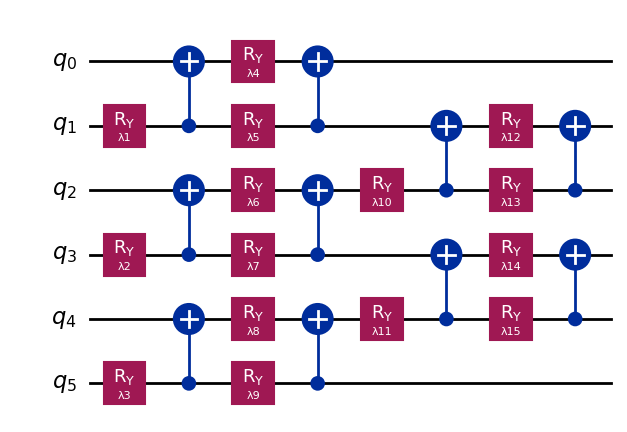

In [47]:
from qiskit.circuit import ParameterVector
qco = QuantumCircuit(6)
params = ParameterVector('λ', 16)
p_idx = 0
qco.ry(params[p_idx+1],1)
qco.ry(params[p_idx+2],3)
qco.ry(params[p_idx+3],5)
qco.cx(1,0)
qco.cx(3,2)
qco.cx(5,4)
qco.ry(params[p_idx+4],0)
qco.ry(params[p_idx+5],1)
qco.ry(params[p_idx+6],2)
qco.ry(params[p_idx+7],3)
qco.ry(params[p_idx+8],4)
qco.ry(params[p_idx+9],5)
qco.cx(1,0)
qco.cx(3,2)
qco.cx(5,4)
qco.ry(params[p_idx+10],2)
qco.ry(params[p_idx+11],4)
qco.cx(2,1)
qco.cx(4,3)
qco.ry(params[p_idx+12],1)
qco.ry(params[p_idx+13],2)
qco.ry(params[p_idx+14],3)
qco.ry(params[p_idx+15],4)
qco.cx(2,1)
qco.cx(4,3)
qco.draw('mpl')
state = Statevector.from_instruction(qc)
state_o = Statevector.from_instruction(qco)
exact_inner_product = np.inner(state.conjugate(), state_o)
print(f"Exact |<phi|psi>|^2: {np.abs(exact_inner_product)**2}")

TypeError: Parameter expression with unbound parameters {Symbol { name: "λ", uuid: 1e4d2e1d-3dae-4ff8-8383-2ab320f3865d, index: Some(1), vector: Some(Py(0x7fa159c62bc0)) }} is not numeric.

# Task 2

## **2a)**

Create a 3 qubit circuit and apply the Hadamard transform as shown below. Run the circuit using `Aersimulator` and **print the statevector states and coefficients**. Generalize the code to an $n$-qubit circuit and test different numbers of qubits. What happens? Discuss the result with your team.

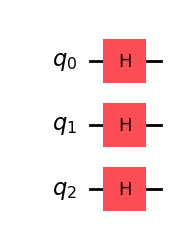

In [12]:
def create_hadamard_circuit(n):
    qc = QuantumCircuit(n)
    #apply H to each qubit
    for i in range(n):
        qc.h(i)
    return qc

def run_and_analyze(n):
    qc = create_hadamard_circuit(n)
    qc.save_statevector()
    simulator = AerSimulator()
    job = simulator.run(qc)
    result = job.result()
    statevector = result.get_statevector()

    for i, amplitude in enumerate(statevector):
        binary = format(i, f'0{n}b')
        real_part = np.real(amplitude)
        print(f"|{binary}⟩: {real_part:+.6f}")

    all_equal = np.allclose(np.abs(statevector), 1/np.sqrt(2**n))
    coefficient = 1/np.sqrt(2**n)

    print(f"Total number of states: 2^{n} = {2**n}")
    print(f"Each coefficient magnitude: 1/√(2^{n}) = 1/√{2**n} ≈ {coefficient:.6f}")
    print(f"All coefficients equal? {all_equal}")
    print(f"Superposition: Equal probability for all basis states")
    print(f"Probability per state: {coefficient**2:.6f} = {coefficient**2*100:.4f}%")


run_and_analyze(1)
# for n in [3, 1, 2, 4, 5]:
#     run_and_analyze(n)

|0⟩: +0.707107
|1⟩: +0.707107
Total number of states: 2^1 = 2
Each coefficient magnitude: 1/√(2^1) = 1/√2 ≈ 0.707107
All coefficients equal? True
Superposition: Equal probability for all basis states
Probability per state: 0.500000 = 50.0000%


/tmp/ipython-input-1556759496.py:16: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amplitude in enumerate(statevector):


## **2b)**  

Consider a single qubit. We want a circuit that reflects the |0> state (adding a minus sign, $-$|0>) and leaves |1> unchanged. Create this circuit using any sequence of Pauli gates (X, Y, Z). Test your solution by applying it after the Hadamard transform and seeing the statevector coefficients. **Draw the circuit.**


Initial state |0⟩:
  |0⟩: (1+0j)
  |1⟩: 0j

Final state:
  |0⟩: (-1+0j)
  |1⟩: 0j

Initial state |1⟩:
  |0⟩: -0j
  |1⟩: 1j

Final state:
  |0⟩: 0j
  |1⟩: 1j

After Hadamard: (|0⟩ + |1⟩)/√2
  |0⟩: (0.7071067811865476+0j)
  |1⟩: (0.7071067811865475+0j)

After YZY: (-|0⟩ + |1⟩)/√2
  |0⟩: (-0.7071067811865476+0j)
  |1⟩: (0.7071067811865475+0j)


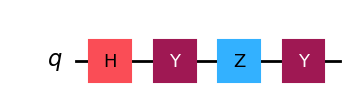

In [14]:
# Create the circuit with YZY sequence
qc = QuantumCircuit(1)
qc.y(0)
qc.z(0)
qc.y(0)
qc.draw('mpl')

qc_test1 = QuantumCircuit(1)
qc_test1.save_statevector(label='initial')
qc_test1.y(0)
qc_test1.z(0)
qc_test1.y(0)
qc_test1.save_statevector(label='final')

simulator = AerSimulator()
result1 = simulator.run(qc_test1).result()

initial_state = result1.data()['initial']
final_state = result1.data()['final']

print("\nInitial state |0⟩:")
print(f"  |0⟩: {initial_state[0]}")
print(f"  |1⟩: {initial_state[1]}")

print("\nFinal state:")
print(f"  |0⟩: {final_state[0]}")
print(f"  |1⟩: {final_state[1]}")


qc_test2 = QuantumCircuit(1)
qc_test2.y(0)
qc_test2.save_statevector(label='initial')
qc_test2.y(0)
qc_test2.z(0)
qc_test2.y(0)
qc_test2.save_statevector(label='final')

result2 = simulator.run(qc_test2).result()

initial_state2 = result2.data()['initial']
final_state2 = result2.data()['final']

print("\nInitial state |1⟩:")
print(f"  |0⟩: {initial_state2[0]}")
print(f"  |1⟩: {initial_state2[1]}")

print("\nFinal state:")
print(f"  |0⟩: {final_state2[0]}")
print(f"  |1⟩: {final_state2[1]}")

# Test: Apply after Hadamard (creates superposition)
qc_hadamard = QuantumCircuit(1)
qc_hadamard.h(0)
qc_hadamard.save_statevector(label='after_H')
qc_hadamard.y(0)
qc_hadamard.z(0)
qc_hadamard.y(0)
qc_hadamard.save_statevector(label='after_YZY')

result3 = simulator.run(qc_hadamard).result()

after_h = result3.data()['after_H']
after_xzx = result3.data()['after_YZY']

print("\nAfter Hadamard: (|0⟩ + |1⟩)/√2")
print(f"  |0⟩: {after_h[0]}")
print(f"  |1⟩: {after_h[1]}")

print("\nAfter YZY: (-|0⟩ + |1⟩)/√2")
print(f"  |0⟩: {after_xzx[0]}")
print(f"  |1⟩: {after_xzx[1]}")

qc_complete = QuantumCircuit(1)
qc_complete.h(0)
qc_complete.y(0)
qc_complete.z(0)
qc_complete.y(0)
qc_complete.draw('mpl')


## **2c)**  

Generalize the zero-reflection operator to $2$ qubits, then to $n$ qubits. **Draw the circuit for n=6.**

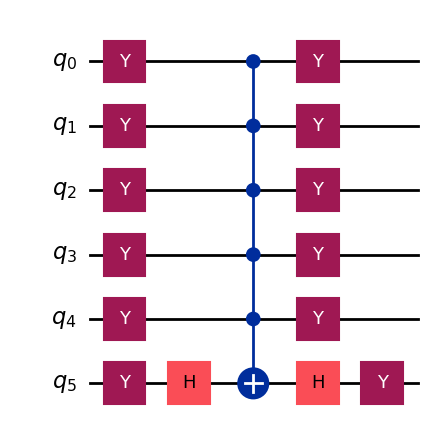

In [15]:
n = 6
qc = QuantumCircuit(n)

# Step 1: Flip all qubits with Y gates
for i in range(n):
    qc.y(i)

# Step 2: Multi-controlled Z gate
if n == 1:
    qc.z(0)
elif n == 2:
    qc.cz(0, 1)
elif n == 3:
    qc.ccz(0, 1, 2)
else:
    # For n > 3, use general multi-controlled Z
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

# Step 3: Flip all qubits back
for i in range(n):
    qc.y(i)
qc.draw('mpl')


# simulator = AerSimulator()
# basis_states = ['000', '001', '010', '011','100', '101', '110', '111']
# for basis in basis_states:
#     qc_test = QuantumCircuit(3)
#     if basis[0] == '1':
#         qc_test.y(0)
#     if basis[1] == '1':
#         qc_test.y(1)
#     if basis[2] == '1':
#         qc_test.y(2)

#     qc_test.save_statevector(label='before')

#     # Apply zero-reflection
#     for i in range(3):
#       qc_test.y(i)
#     qc_test.h(2)
#     qc_test.mcx(list(range(2)),2)
#     qc_test.h(2)  # Controlled-Z
#     for i in range(3):
#         qc_test.y(i)
#     qc_test.save_statevector(label='after')

#     result = simulator.run(qc_test).result()
#     before = result.data()['before']
#     after = result.data()['after']

#     print(f"\n|{basis}⟩:")
#     print(f"  Before: {before}")
#     print(f"  After:  {after}")

#     # Check
#     if basis == '000':
#         if np.isclose(after[0], -before[0]):
#             print(f"  ✓ |000⟩ → -|000⟩ (coefficient: {after[0]:.6f})")
#     else:
#         idx = int(basis, 2)
#         if np.isclose(after[idx], before[idx]):
#             print(f"  ✓ |{basis}⟩ unchanged")




## **2d)**  

 Now we want to reflect an arbitrary state, initialized by a given operator $A$. Consider this operator to be the Hadamard transform (you can convert it to a gate using the `to_gate(label="A")` instruction on the circuit). Implement the reflection circuit for arbitrary $n$. **Draw the circuit for $n=6$.**

 _Hint: Reuse the operator you defined in **2c**._

In [16]:
def zero_reflection(n):
  qc = QuantumCircuit(n)
  for i in range(n):
      qc.y(i)

  if n == 1:
      qc.z(0)
  elif n == 2:
      qc.cz(0, 1)
  elif n == 3:
      qc.ccz(0, 1, 2)
  else:
      qc.h(n-1)
      qc.mcx(list(range(n-1)), n-1)
      qc.h(n-1)

  # Flip back
  for i in range(n):
      qc.y(i)

  return qc

def arbitrary_state_reflection(n, A_operator):
    """
    Reflects about state |ψ⟩ = A|0⟩
    Formula: A · (zero-reflection) · A_inv
    """
    qc = QuantumCircuit(n)

    # qc.append(A_operator.inverse(), range(n))
    A_inv = A_operator.inverse()
    A_inv.label = "A'"
    qc.append(A_inv, range(n))

    #applying zero reflection
    zero_ref = zero_reflection(n)
    qc = qc.compose(zero_ref)

    qc.append(A_operator, range(n))

    return qc

def create_hadamard_operator(n):
    """Create Hadamard transform on n qubits and convert to gate"""
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    return qc.to_gate(label="A")

A = create_hadamard_operator(6)
qc = arbitrary_state_reflection(6, A)
print(qc.draw())

     ┌─────┐┌───┐          ┌───┐     ┌────┐
q_0: ┤0    ├┤ Y ├───────■──┤ Y ├─────┤0   ├
     │     │├───┤       │  ├───┤     │    │
q_1: ┤1    ├┤ Y ├───────■──┤ Y ├─────┤1   ├
     │     │├───┤       │  ├───┤     │    │
q_2: ┤2    ├┤ Y ├───────■──┤ Y ├─────┤2   ├
     │  A' │├───┤       │  ├───┤     │  A │
q_3: ┤3    ├┤ Y ├───────■──┤ Y ├─────┤3   ├
     │     │├───┤       │  ├───┤     │    │
q_4: ┤4    ├┤ Y ├───────■──┤ Y ├─────┤4   ├
     │     │├───┤┌───┐┌─┴─┐├───┤┌───┐│    │
q_5: ┤5    ├┤ Y ├┤ H ├┤ X ├┤ H ├┤ Y ├┤5   ├
     └─────┘└───┘└───┘└───┘└───┘└───┘└────┘


## **2e)**  

Consider the state `w='010101...'` (alternating between 0 and 1) for arbitrary lengths. Build a circuit that reflects this state (and leaves all others unchanged) for arbitrary $n$. We'll call this circuit *the oracle*. **Draw it for $n=3$ and print the statevector coefficients.**

In [50]:
def alternating_oracle(n):
    qc = QuantumCircuit(n)

    # Flip even position qubits to create '11111..' pattern
    for i in range(n):
        if i % 2 == 0:
            qc.x(i)

    # Multi-controlled Z gate
    if n == 1:
        qc.z(0)
    elif n == 2:
        qc.cz(0, 1)
    elif n == 3:
        qc.ccz(0, 1, 2)
    else:
        qc.h(n-1)
        qc.mcx(list(range(n-1)), n-1)
        qc.h(n-1)

    # Flip them back
    for i in range(n):
        if i % 2 == 0:
            qc.x(i)

    return qc

# Draw circuit for n=3
qc = alternating_oracle(3)
print(qc.draw())
print()

# Print statevector coefficients
simulator = AerSimulator()

qc_super = QuantumCircuit(3)
for i in range(3):
    qc_super.h(i)

qc_super = qc_super.compose(alternating_oracle(3))
qc_super.save_statevector()

result = simulator.run(qc_super).result()
statevector = result.get_statevector()

print("Statevector coefficients:")
for i in range(8):
    state_str = format(i, '03b')
    coeff = statevector[i]
    print(f"|{state_str}⟩: {coeff.real:+.8f}")

     ┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     └───┘ │ └───┘
q_1: ──────■──────
     ┌───┐ │ ┌───┐
q_2: ┤ X ├─■─┤ X ├
     └───┘   └───┘

Statevector coefficients:
|000⟩: +0.35355339
|001⟩: +0.35355339
|010⟩: -0.35355339
|011⟩: +0.35355339
|100⟩: +0.35355339
|101⟩: +0.35355339
|110⟩: +0.35355339
|111⟩: +0.35355339


## **2f)**  

Build an operator consisting of the sequential application of the oracle and the reflection-of-$A$ operator, by this order, with $A$ as defined previously. Create a function that given $A$, the oracle, and an integer `m`, returns a circuit that applies $A$, followed by `m` repetitions of the operator you just created. Test this circuit for $A$ and the oracle defined previously, and increasing ms: `m = [0, 1, 2, 3, 4, ..., 20]`. **Plot the final amplitude (statevector coefficient) of `w`** (as defined in **2e**) **as a function of `m`.**

_Suggestion: Do this using an auxiliary function `get_data(A, oracle, ms)` that returns `xs`, a list of the data in correspondence with `ms` (in this case, the `xs` are amplitudes)._

/tmp/ipython-input-168612160.py:163: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


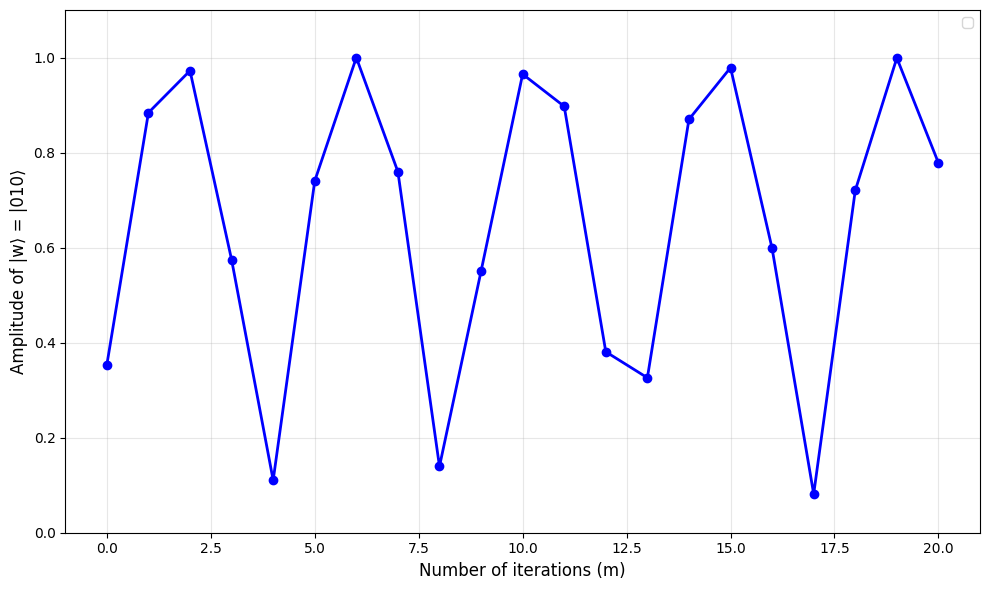

In [54]:
def zero_reflection(qc, qubits):
    """Applying zero-reflection operator directly to the circuit"""
    n = len(qubits)

    # Apply Y to all qubits
    for q in qubits:
        qc.y(q)

    # mcz step
    if n == 1:
        qc.z(qubits[0])
    elif n == 2:
        qc.cz(qubits[0], qubits[1])
    elif n == 3:
        qc.ccz(qubits[0], qubits[1], qubits[2])
    else:
        qc.h(qubits[-1])
        qc.mcx(qubits[:-1], qubits[-1])
        qc.h(qubits[-1])

    # Apply Y to all qubits again
    for q in qubits:
        qc.y(q)

def apply_hadamard_inverse(qc, qubits):
    """Applying Hadamard inverse (which is just Hadamard since H_inv = H)"""
    for q in qubits:
        qc.h(q)

def apply_hadamard(qc, qubits):
    """Applying Hadamard transform"""
    for q in qubits:
        qc.h(q)

def arbitrary_state_reflection(qc, qubits):
    """
    Apply reflection about state |ψ⟩ = H|0⟩
    Formula: H · (zero-reflection) · H_inv
    """
    # Apply H_inv (which is H for Hadamard)
    apply_hadamard_inverse(qc, qubits)

    # Apply zero reflection
    zero_reflection(qc, qubits)

    # Apply H
    apply_hadamard(qc, qubits)

def alternating_oracle(qc, qubits):
    """Apply oracle that marks |010101...⟩ state"""
    n = len(qubits)

    # Flip even positions (where pattern has '0')
    for i, q in enumerate(qubits):
        if i % 2 == 0:
            qc.x(q)

    # mcz step
    if n == 1:
        qc.z(qubits[0])
    elif n == 2:
        qc.cz(qubits[0], qubits[1])
    elif n == 3:
        qc.ccz(qubits[0], qubits[1], qubits[2])
    else:
        qc.h(qubits[-1])
        qc.mcx(qubits[:-1], qubits[-1])
        qc.h(qubits[-1])

    # Flip back
    for i, q in enumerate(qubits):
        if i % 2 == 0:
            qc.x(q)

def grover_like(n, m):
    """
    Build Grover's like circuit
    n: Number of qubits
    m: Number of iterations

    Returns circuit with m Grover iterations
    """
    qc = QuantumCircuit(n)
    qubits = list(range(n))

    # Apply initial Hadamard to create superposition
    apply_hadamard(qc, qubits)

    # Apply m iterations of (Oracle · Diffusion)
    for _ in range(m):
        # Apply oracle
        alternating_oracle(qc, qubits)

        # Apply diffusion (reflection about uniform superposition)
        arbitrary_state_reflection(qc, qubits)

    return qc

def get_data(ms, n=3):
    """
    Get amplitude data for different numbers of iterations

    ms: List of iteration counts
    n: Number of qubits (default 3)

    Returns: List of amplitudes for the target state w
    """
    # Calculate target state index (for alternating pattern |010101...⟩)
    # For n qubits: even positions have 0, odd positions have 1
    target_index = 0
    for i in range(n):
        if i % 2 == 1:  # Odd positions
            target_index += 2**i

    simulator = AerSimulator()
    amplitudes = []

    for m in ms:
        # Build Grover circuit
        qc = grover_like(n, m)

        # Save statevector
        qc.save_statevector()

        # Run simulation
        result = simulator.run(qc).result()
        statevector = result.get_statevector()

        # Get amplitude of target state
        amplitude = abs(statevector[target_index])
        amplitudes.append(amplitude)

    return amplitudes

# Define parameters
n = 3  # Number of qubits
ms = list(range(21))  # m = 0, 1, 2, ..., 20

# Get amplitude data
amplitudes = get_data(ms, n)

# # Print results
# print("Grover's Algorithm: Amplitude of |w⟩ = |010⟩ vs iterations")
# for m, amp in zip(ms, amplitudes):
#     print(f"m = {m:2d}: amplitude = {amp:.6f}")

# # Find optimal m
# optimal_m = ms[np.argmax(amplitudes)]
# max_amplitude = max(amplitudes)
# print(f"\nOptimal iterations: m = {optimal_m}")
# print(f"Maximum amplitude: {max_amplitude:.6f}")
# print(f"Success probability: {max_amplitude**2:.6f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ms, amplitudes, 'b-o', linewidth=2, markersize=6)
# plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='Perfect amplitude')
# plt.axvline(x=optimal_m, color='g', linestyle='--', alpha=0.5, label=f'Optimal m={optimal_m}')
plt.xlabel('Number of iterations (m)', fontsize=12)
plt.ylabel('Amplitude of |w⟩ = |010⟩', fontsize=12)
# plt.title('Amplitude Amplification', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


## **2g)**  

Add the reference $A(m) = \sin\big((2m+1)*\arcsin(\sqrt{p_\text{true}})\big)$, where $p_\text{true}=1/2^n$ and $n$ is the number of qubits, to the previous plot. **Plot the points of 2f along with this curve.**

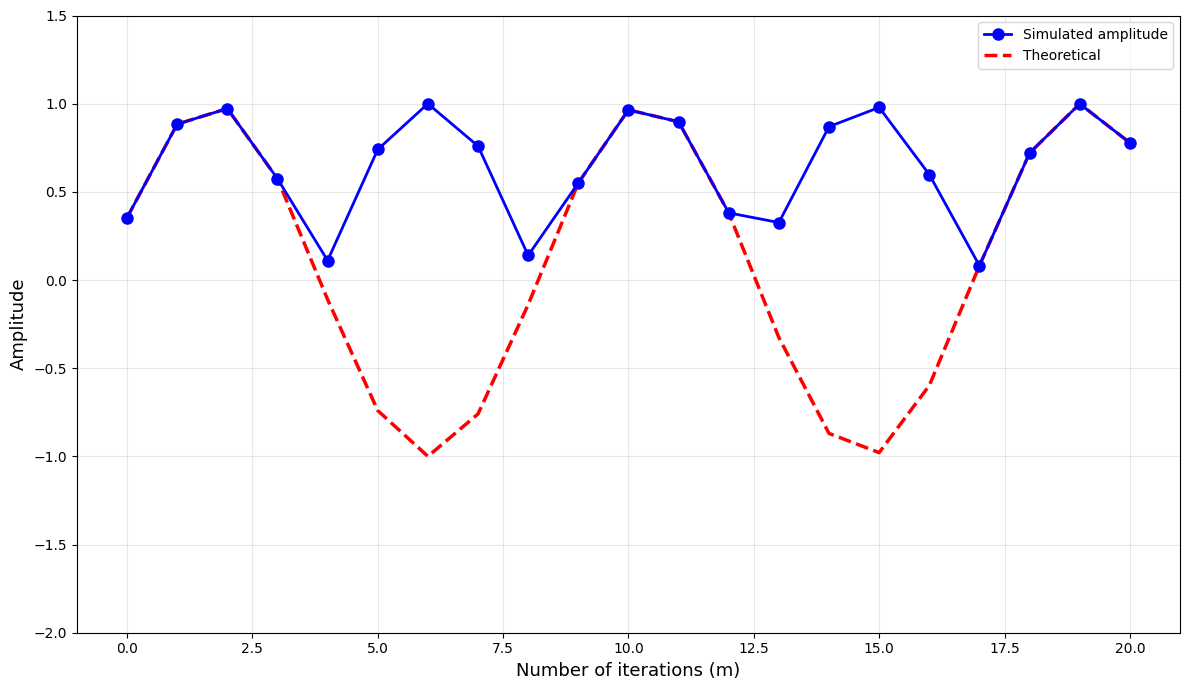

In [65]:
# Define parameters
n = 3  # Number of qubits
ms = list(range(21))  # m = 0, 1, 2, ..., 20

# Get amplitude data
amplitudes = get_data(ms, n)

# Calculate theoretical amplitude curve
p_true = 1 / (2**n)  # Probability of one state out of 2^n states
theoretical_amplitudes = []
for m in ms:
    A_m = np.sin((2*m + 1) * np.arcsin(np.sqrt(p_true)))
    theoretical_amplitudes.append(A_m)

# Plot the results with theoretical curve
plt.figure(figsize=(12, 7))
plt.plot(ms, amplitudes, 'b-o', linewidth=2, markersize=8, label='Simulated amplitude', zorder=3)
plt.plot(ms, theoretical_amplitudes, 'r--', linewidth=2.5, label='Theoretical'
, zorder=2)


plt.xlabel('Number of iterations (m)', fontsize=13)
plt.ylabel('Amplitude', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='best')
plt.ylim(-2, 1.5)
plt.tight_layout()
plt.show()

## **2h)**  

Repeat the plot of **2f**, but change the following: run the circuits using the Aer simulator with 1024 shots, and **plot the number of times `w` was measured as a function of `m`, using $\text{Nshots}*P(m)$ as a reference, with $P(m)=A(m)^2$.**

_Suggestion: Do this by modifying the `get_data` function to accept an optional argument `Nshots`, and return a list of integers (numbers of times `w` was measured)._

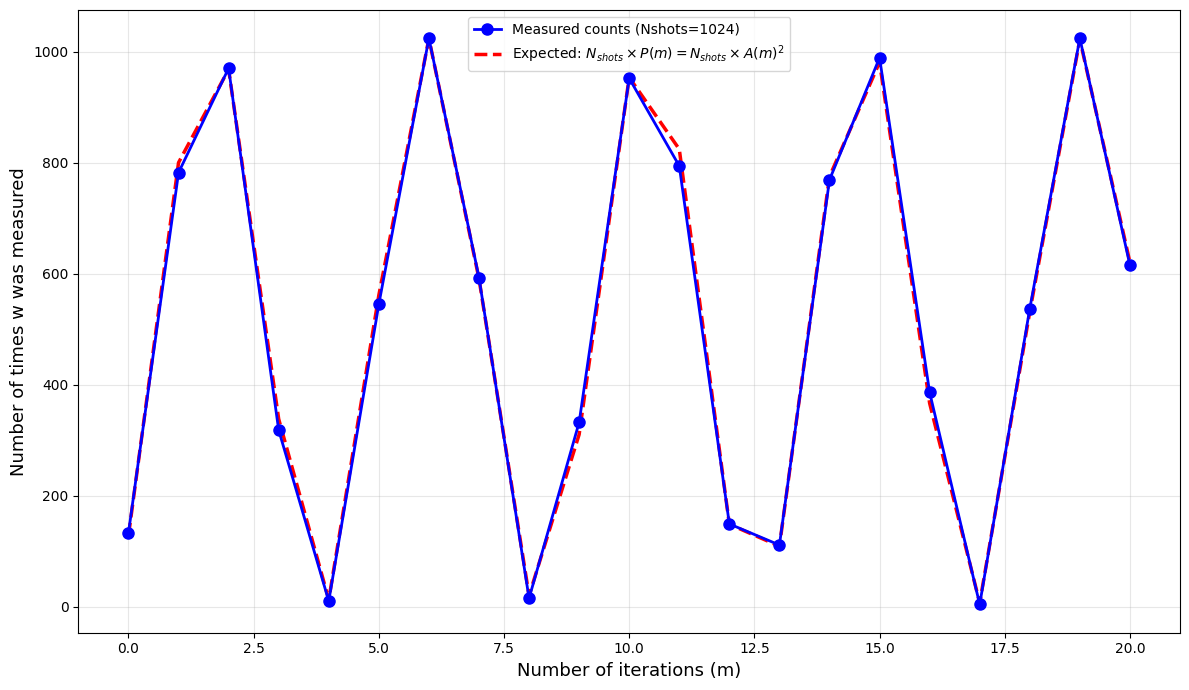

In [64]:
def get_data(ms, n=3, Nshots=None):
    """
    Get amplitude data for different numbers of iterations

    ms: List of iteration counts
    n: Number of qubits (default 3)
    Nshots: If None, return amplitudes. If int, return measurement counts

    Returns: List of amplitudes (if Nshots=None) or counts (if Nshots is set)
    """
    # Calculate target state index (for alternating pattern |010101...⟩)
    target_index = 0
    for i in range(n):
        if i % 2 == 1:  # Odd positions
            target_index += 2**i

    simulator = AerSimulator()
    results_list = []

    for m in ms:
        # Build Grover circuit
        qc = grover_like(n, m)

        if Nshots is None:
            # Statevector simulation
            qc.save_statevector()
            result = simulator.run(qc).result()
            statevector = result.get_statevector()
            amplitude = abs(statevector[target_index])
            results_list.append(amplitude)
        else:
            # Measurement simulation
            qc.measure_all()
            result = simulator.run(qc, shots=Nshots).result()
            counts = result.get_counts()

            # Target state in binary (reversed for Qiskit's convention)
            target_bitstring = format(target_index, f'0{n}b')[::-1]

            # Count how many times w was measured
            w_count = counts.get(target_bitstring, 0)
            results_list.append(w_count)

    return results_list

Nshots = 1024
measured_counts = get_data(ms, n, Nshots=Nshots)

# Calculate theoretical probabilities and expected counts
p_true = 1 / (2**n)
theoretical_probs = []
for m in ms:
    A_m = np.sin((2*m + 1) * np.arcsin(np.sqrt(p_true)))
    P_m = A_m**2
    theoretical_probs.append(P_m)

# Expected counts = Nshots * P(m)
expected_counts = [Nshots * P_m for P_m in theoretical_probs]

# Plot measured counts vs expected counts
plt.figure(figsize=(12, 7))
plt.plot(ms, measured_counts, 'b-o', linewidth=2, markersize=8, label=f'Measured counts (Nshots={Nshots})', zorder=3)
plt.plot(ms, expected_counts, 'r--', linewidth=2.5, label='Expected: $N_{shots} \\times P(m) = N_{shots} \\times A(m)^2$', zorder=2)

plt.xlabel('Number of iterations (m)', fontsize=13)
plt.ylabel('Number of times w was measured', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

## **2i)**  

Consider the parameter $p$, defined as the probability of measuring `w` after applying $A$, which you should think of as an unknown (although in this case we know it to be $1/2^n$, as follows from the operators we constructed).

Given an `m` and an `x` (number of times `w` was the measurement outcome), you can now calculate the likelihood $L$ (probability of generating the datum) for any $p \in [0,1]$ using the square of the sine function from **2g**. E.g., for a single shot measurement, $L(p \mid m, x=1) = \sin\big((2m+1)*\arcsin(\sqrt{p})\big)^2$, and $L(p \mid m, x=0)$ is its complement.

Generalize this calculation for a dataset (`ms`, `xs`), using the multiplication rule for joint probabilities of independent events. Collect data for `ms = [0, 1, 2, 3, 4, 5]` with $100$ shots each using the `get_data` function from before, and **plot the likelihood as a function of $p$.** Mark the real value with a dashed vertical bar as a reference.



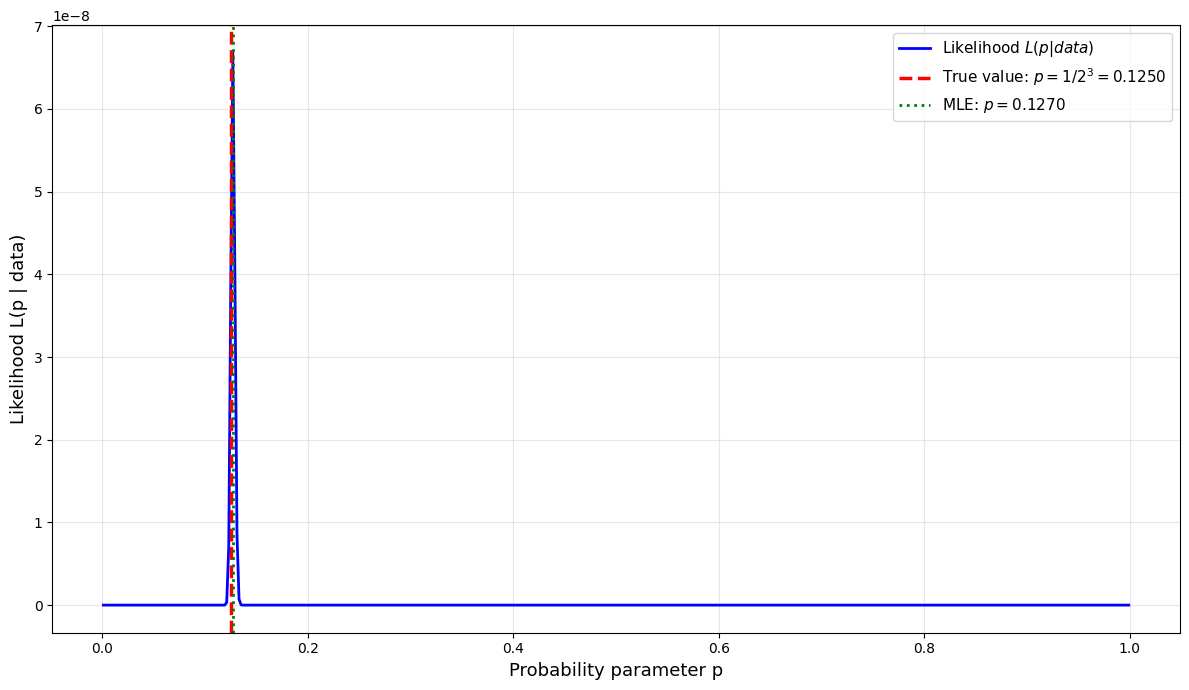

In [68]:
def calculate_likelihood(p, ms, xs):
    """
    Calculate likelihood L(p | ms, xs) for given p and dataset

    p: Probability parameter (between 0 and 1)
    ms: List of iteration counts used
    xs: List of measurement outcomes (number of times w was measured for each m)

    Returns: Likelihood value
    """
    likelihood = 1.0

    for m, x, Nshots in zip(ms, xs, [100]*len(ms)):  # 100 shots each as per the question
        # Probability of measuring w given p and m
        A_m = np.sin((2*m + 1) * np.arcsin(np.sqrt(p)))
        P_w = A_m**2  # Probability of measuring w
        P_not_w = 1 - P_w  # Probability of not measuring w, independent event

        # Binomial probability: L(p | m, x) = P_w^x * P_not_w^(Nshots-x)
        # We need the binomial coefficient too for proper likelihood
        from scipy.special import comb
        L_single = comb(Nshots, x, exact=True) * (P_w**x) * (P_not_w**(Nshots-x))

        # Multiply likelihoods (independent events)
        likelihood *= L_single

    return likelihood


# Collect data for ms = [0, 1, 2, 3, 4, 5] with 100 shots each
ms_data = [0, 1, 2, 3, 4, 5]
Nshots_per_m = 100
xs_data = get_data(ms_data, n=3, Nshots=Nshots_per_m)

# Calculate likelihood for range of p values
p_values = np.linspace(0.001, 0.999, 500)  # Avoid exactly 0 and 1
likelihoods = []

for p in p_values:
    L = calculate_likelihood(p, ms_data, xs_data)
    likelihoods.append(L)

# Find maximum likelihood estimate
max_likelihood_idx = np.argmax(likelihoods)
p_mle = p_values[max_likelihood_idx]

# True value
p_true = 1 / (2**n)

# Plot likelihood function
plt.figure(figsize=(12, 7))
plt.plot(p_values, likelihoods, 'b-', linewidth=2, label='Likelihood $L(p | data)$')
plt.axvline(x=p_true, color='r', linestyle='--', linewidth=2.5, label=f'True value: $p = 1/2^{n} = {p_true:.4f}$')
plt.axvline(x=p_mle, color='g', linestyle=':', linewidth=2, label=f'MLE: $p = {p_mle:.4f}$')

plt.xlabel('Probability parameter p', fontsize=13)
plt.ylabel('Likelihood L(p | data)', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()


## **2j)**  

Consider the task of estimating $p$ from data. We can do this by maximizing the likelihood. Create a function `maximize_likelihood(ms, xs, Nshots)` that does this, using an optimization function from `scipy.optimize`. Test this function for the data of **2i**, and **print the value of $p$ that maximizes its value**.

## **2k)**   

Now we want to consider how the error (absolute deviation from the true value $p_t$) evolves with the cost, defined as the number of calls to the $A$ operator, $N=2m+1$. **Plot the error as a function of $N$ in a log-log scale**, by using the strategy of **2j** to produce incremental estimates on cumulative datasets: `ms=[0]`, then `ms=[0,1]`, ..., until `ms=[0,...,mmax]`. Use `mmaxx = 15`.

## **2l)**  

The results are affected by statistical noise. To reduce this effect, consider the root mean squared errors (RMSEs) over $100$ runs (instead of the error for a single execution as in **2k**).  **Plot the RMSEs as a function of $N$ in a log-log scale**.

## **2m**)

You can now compare the performance of your algorithm with the limits of metrology, the standard quantum limit (SQL, $\mathcal O (N^{-1/2})$ - best case for classical algorithms) and the Heisenberg limit (HL, $\mathcal O (N^{-1})$ - best case for quantum algorithms). **Make a new plot including these limits as a reference (dashed lines) in addition to the values in the plot of 2l.** Use the prefactors $0.35$ and $3$ for the SQL and HL respectively. Using curve fitting, obtain an approximate exponent $k$ in $\mathcal O (N^{-k})$ for the points you obtained and **print this exponent $k$**.

## **2n**)

Repeat **2m**, but using `ms = [0, 1, 2, 4, 8, ..., 2**l]` for `l=6`. **Add this alternative strategy to the previous plot.** Calculate and **print $k$ for this dataset**.

## **2o)**

**Repeat the plot of **2l**, but now with the maximum number of CNOTs in the horizontal axis** (instead of $N$). To obtain this number, decompose the circuit into single-qubit gates and CNOT gates and count the latter.

# Task 3

We now want to combine the insights of the 2 previous tasks. The goal is to improve the estimation of $p$ (as in tasks **2j** to **2o**) by using shorter parametrized circuits to approximate the intended circuits (as in task **1o**). Use the A operator and the oracle as defined in task 2, for 6 qubits.

**Create a plot as in task 2o, but now employing your shallower circuits**.

<ins>The goal is to have the fastest possible convergence of the RMSE with respect to the maximum CNOT count.</ins>

Ignore the costs of optimizing the parametrized circuits. Consider only the CNOTs required by the circuits you use to generate the data.

You may change the sequence of `ms`, the structure of the parametrized circuits, the optimization strategy, etc.

_Hint: You can start by using the parameterized circuit of **1o**, and ms = [0, 1, 2, ...] as in task **2k**. Periodically replace chunks of the circuit by shallower parametrized circuits when the number of operators crosses a threshold of your choice._

**Write a short explanation of your strategy in markdown below.**

Explanation:

*[Write here - double click to edit]*